In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

# Separate features and labels
X_train = train_data.iloc[:, 1:].values / 255.0
Y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values / 255.0
Y_test = test_data.iloc[:, 0].values

# One-hot encode labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Reshape input data to match image format (28x28 pixels, 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


C:\Users\mohan\OneDrive\Desktop\Final Year Project\Models\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8041 - loss: 0.5456 - val_accuracy: 0.8988 - val_loss: 0.2949
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8973 - loss: 0.2828 - val_accuracy: 0.9075 - val_loss: 0.2624
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9172 - loss: 0.2270 - val_accuracy: 0.9136 - val_loss: 0.2425
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9295 - loss: 0.1896 - val_accuracy: 0.9169 - val_loss: 0.2299
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9379 - loss: 0.1689 - val_accuracy: 0.9181 - val_loss: 0.2350
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9485 - loss: 0.1407 - val_accuracy: 0.9232 - val_loss: 0.2295
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9572 - loss: 0.1141 - val_accuracy: 0.9237 - val_loss: 0.2351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9637 - l

In [4]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9162 - loss: 0.2933
Test Set Accuracy: 91.99%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


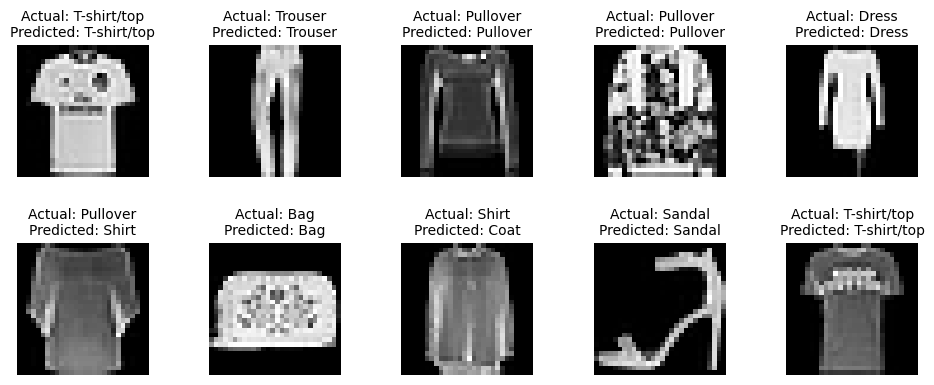

Accuracy: 91.99%


In [5]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def predict_classes(X):
    predictions = model.predict(X)
    return np.argmax(predictions, axis=1)

predicted_classes = predict_classes(X_test)
actual_classes = np.argmax(Y_test, axis=1)

# Plot actual vs predicted images
def plot_images(images, actual, predicted, class_labels):
    plt.figure(figsize=(12, 12))
    for i in range(10):
        plt.subplot(5, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Actual: {class_labels[actual[i]]}\nPredicted: {class_labels[predicted[i]]}", fontsize=10)
        plt.axis('off')
        plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots
    plt.show()


plot_images(X_test, actual_classes, predicted_classes, class_labels)

# Calculate accuracy
accuracy = np.sum(predicted_classes == actual_classes) / actual_classes.size
print(f"Accuracy: {accuracy * 100:.2f}%")